In [1]:
from NeuralNetwork import NeuralNetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Для тепловых карт
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from LayerTypes import LayerTypes, create_layer
from Functions import Functions


plt.rcParams["figure.figsize"] = (20,6)
rng = np.random.default_rng(51)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

In [3]:
dfm=pd.read_csv('Mushroom_dataset.csv', delimiter = ",", names=['class-label','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])
dfm

,class-label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8414,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


In [4]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for column_name in dfm.columns:
    dfm[column_name]=le.fit_transform(dfm[column_name])
Y=dfm.iloc[:, 0:1].values.ravel()
X=dfm.iloc[:, 1:24]

In [5]:
dfm = dfm.drop(['veil-type', 'veil-color', 'gill-attachment'], axis=1)

In [6]:
# 1. Загрузка данных
mushrooms = dfm.copy()
X = mushrooms.drop('class-label', axis=1)
y = mushrooms['class-label']

In [7]:
# 2. Проверка данных
print(X.head())
print(y.value_counts())

# 3. Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Преобразование меток y в формат one-hot
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(pd.DataFrame(y))

# 5. Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.3, random_state=42)

y_train_class = encoder.inverse_transform(y_train)
y_test_class = encoder.inverse_transform(y_test)


   cap-shape  cap-surface  cap-color  bruises  odor  gill-spacing  gill-size  \
0          2            3          8        0     0             1          1   
1          2            3          8        0     0             1          1   
2          2            3          8        0     0             1          1   
3          2            3          8        0     0             1          1   
4          2            3          8        0     0             1          1   

   gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  \
0          10            1           1                         3   
1          10            1           1                         3   
2           7            1           1                         3   
3           7            1           1                         3   
4           1            1           1                         3   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         3    

# Используем модель

In [35]:
net_arch = (X_test.shape[1], 5, 3, 2)
mlp_mushroom = NeuralNetwork(
    layers=[
        create_layer(LayerTypes.DENSE, input_size=net_arch[0],
                     output_size=net_arch[1], activation_function=Functions.sigmoid),
        create_layer(LayerTypes.DENSE, input_size=net_arch[1],
                     output_size=net_arch[2], activation_function=Functions.sigmoid),
        create_layer(LayerTypes.DENSE, input_size=net_arch[2],
                     output_size=net_arch[3], activation_function=Functions.none)
    ],
    learning_rate=0.07
)

In [36]:
X_train.shape

(5891, 19)

In [37]:
epochs = 300
loss_epoches = mlp_mushroom.fit(X_train, y_train, epoch_count=epochs)

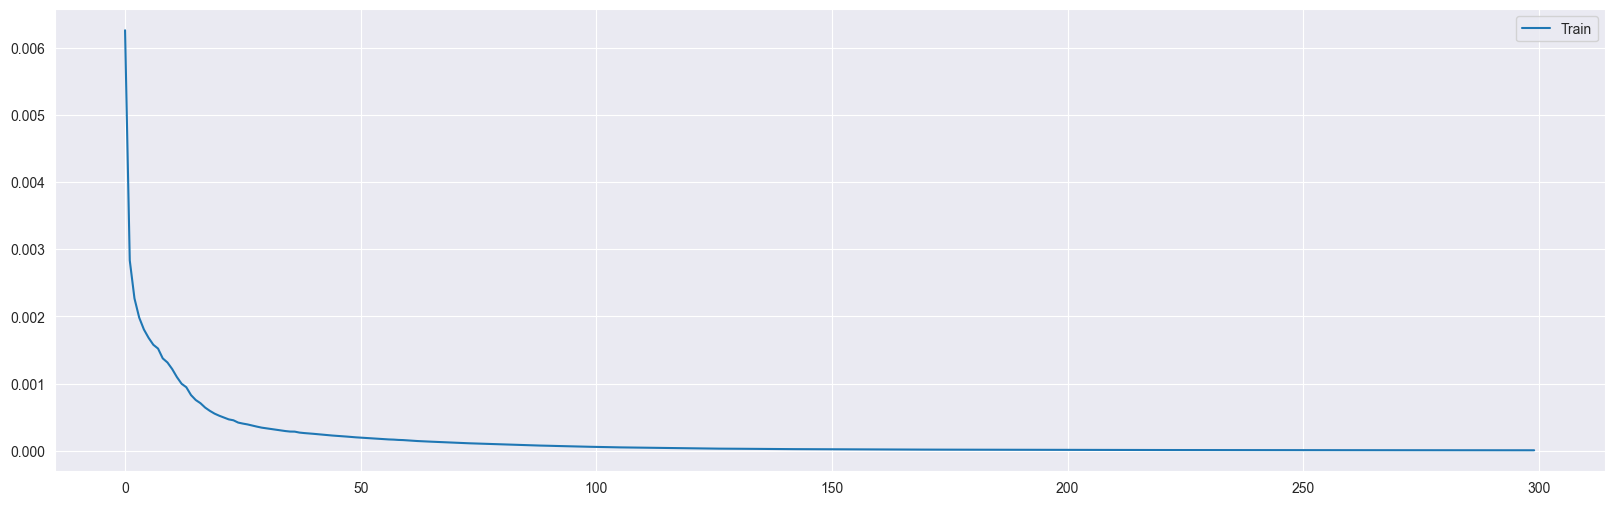

In [38]:
plt.plot(loss_epoches, label='Train')
# plt.plot(loss_test_epoches, label='Test')
plt.legend(loc='upper right')
plt.show()

In [39]:
from pandas import DataFrame

In [40]:


accuracy = 0
predicted = np.argmax(mlp_mushroom.forward(X_test.copy()), axis=1)
confusion_matrix = np.bincount(2 * y_test_class.reshape(-1) + predicted, minlength=4).reshape(2, 2)
confusion_matrix = DataFrame(confusion_matrix)
confusion_matrix

,0,1
0,1355,0
1,0,1170


In [42]:
accuracy = np.diag(confusion_matrix).sum()/confusion_matrix.sum().sum()
accuracy

1.0

In [ ]:
confusion_matrix.sum().sum()